min alpha: 1.0
max alpha: 20.81
Fixed true epsilon: 0.11
Performative Gaps: [0.10881393 0.10881957 0.10882521 0.10883085 0.10883649 0.10884213
 0.10884777 0.10885341 0.10885905 0.1088647  0.10887034 0.10887599
 0.10888163 0.10888728 0.10889292 0.10889857 0.10890422 0.10890986
 0.10891551 0.10892116 0.10892681 0.10893246 0.10893811 0.10894376
 0.10894942 0.10895507 0.10896072 0.10896638 0.10897203 0.10897769
 0.10898334 0.108989   0.10899465 0.10900031 0.10900597 0.10901163
 0.10901729 0.10902295 0.10902861 0.10903427 0.10903993 0.10904559
 0.10905125 0.10905692 0.10906258 0.10906825 0.10907391 0.10907958
 0.10908524 0.10909091 0.10909658 0.10910224 0.10910791 0.10911358
 0.10911925 0.10912492 0.10913059 0.10913626 0.10914194 0.10914761
 0.10915328 0.10915896 0.10916463 0.10917031 0.10917598 0.10918166
 0.10918733 0.10919301 0.10919869 0.10920437 0.10921005 0.10921573
 0.10922141 0.10922709 0.10923277 0.10923845 0.10924413 0.10924982
 0.1092555  0.10926119 0.10926687 0.10927256 0.109278

<Figure size 640x480 with 0 Axes>

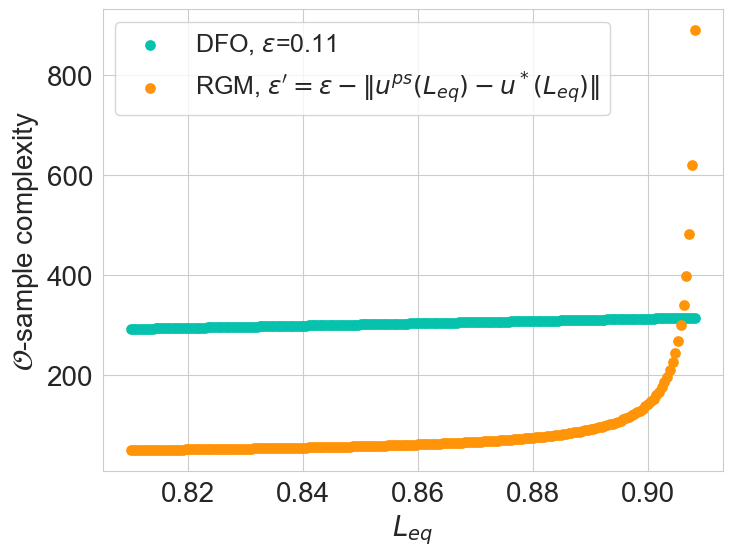

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

grad_lip_ell_in_u = 20
L_l = 0.8      
alpha_strong_convexity = 10 #8.5   
R = 4.0       
sigma_m = 1.0
dimension = 2
B = 1.0
lip_ell_in_z = 1
grad_lip_ell_in_z= 1

LipEq_values = np.linspace(0.81, 1.0, 400)

def sample_complexity_rgm(LipEq, grad_lip_ell_in_u,grad_lip_ell_in_z, alpha_strong_convexity, R, epsilon, sigma_m):
    term1 = (grad_lip_ell_in_u**2 + grad_lip_ell_in_z**2 * LipEq**2) / alpha_strong_convexity**2 * np.log(2 * R**2 / epsilon)
    term2 = (sigma_m**2) / (alpha_strong_convexity**2 * epsilon)
    return term1 + term2


def sample_complexity_dfo(LipEq, grad_lip_ell_in_u,grad_lip_ell_in_z, alpha_strong_convexity, c, epsilon):
    L = grad_lip_ell_in_u+LipEq*grad_lip_ell_in_z
    alpha_bar = (alpha_strong_convexity - 2 * LipEq * L_l)
    
    assert (alpha_bar > 0).all(), f"alpha_bar should be greater than 0, {alpha_bar}"
    
    term1 = 16 * np.power(alpha_bar, 4) * epsilon * np.power(B, 2)
    term2 = 8 * c * np.power((alpha_bar + L) * B + L, 2)
    # term1 is a scalar, term2 is a vector.
    # make an array of term1 to match the shape of term2
    term1_arr = np.full(term2.shape, term1)
    # take the element-wise maximum of term1_arr and term2
    max_term = np.maximum(term1_arr, term2)
    
    return max_term / (np.power(alpha_bar, 4) * np.power(epsilon, 2))

def performative_gap(LipEq, grad_lip_ell_in_z, lip_ell_in_z, alpha_strong_convexity):
    return (1+LipEq) * lip_ell_in_z / (alpha_strong_convexity - LipEq * grad_lip_ell_in_z)

def performative_gap_u_only(LipEq, grad_lip_ell_in_z, lip_ell_in_z, alpha_strong_convexity):
    return lip_ell_in_z / (alpha_strong_convexity - LipEq * grad_lip_ell_in_z)

print("min alpha:", max(LipEq_values * lip_ell_in_z))
print("max alpha:",min(grad_lip_ell_in_u + lip_ell_in_z * LipEq_values))

assert (alpha_strong_convexity > LipEq_values * grad_lip_ell_in_z).all(), f"wrong no pse"
assert (alpha_strong_convexity < grad_lip_ell_in_u + grad_lip_ell_in_z * LipEq_values).all(), f"wrong violate loss"


performative_gap_u = performative_gap_u_only(LipEq_values, grad_lip_ell_in_z, lip_ell_in_z, alpha_strong_convexity)
true_stack_epsilons = [0.11]
plt.clf()
for true_stack_epsilon in true_stack_epsilons:
    # print(f"Running with true Stackelberg Epsilon: {true_stack_epsilon}")
    # keep only the elements of performative_gap_u that are less than true_stack_epsilon
    
    performative_gap_values_epsilon = performative_gap_u[performative_gap_u < true_stack_epsilon]   
    assert (performative_gap_values_epsilon < true_stack_epsilon).all(), f"performative_gap_values should be less than true_stack_epsilon, {true_stack_epsilon}, {performative_gap_values}"
    
    print("Fixed true epsilon:", true_stack_epsilon)
    if true_stack_epsilon == 0.11:
        print("Performative Gaps:", performative_gap_values_epsilon)
         
    LipEq_values_epsilon = LipEq_values[performative_gap_u < true_stack_epsilon]
    assert len(performative_gap_values_epsilon) == len(LipEq_values_epsilon), f"performative_gap_values_epsilon and LipEq_values_epsilon should have the same length"
    
    epsilon_prime = true_stack_epsilon - performative_gap_values_epsilon
    if true_stack_epsilon == 0.11:
        print("Epsilon primes:", epsilon_prime)
        
    # create array of just true_stack_epsilon for the same length as epsilon_prime
    true_stack_epsilon_arr = np.full(epsilon_prime.shape, true_stack_epsilon)
    assert len(epsilon_prime) == len(LipEq_values_epsilon), f"epsilon_prime and LipEq_values_epsilon should have the same length"
    # get same size epsilon array
    
    sample_complexity_rgm_values = sample_complexity_rgm(LipEq_values_epsilon, grad_lip_ell_in_u, grad_lip_ell_in_z, alpha_strong_convexity, R, epsilon_prime, sigma_m)
    sample_complexity_dfo_values = sample_complexity_dfo(LipEq_values_epsilon, grad_lip_ell_in_u, grad_lip_ell_in_z, alpha_strong_convexity, c=1, epsilon=true_stack_epsilon)    
    
    plt.figure(figsize=(8, 6))
    plt.scatter(LipEq_values_epsilon[:-2], sample_complexity_dfo_values[:-2],s=45, label=f'DFO, $\epsilon$={true_stack_epsilon}', color='xkcd:turquoise')
    plt.scatter(LipEq_values_epsilon[:-2], sample_complexity_rgm_values[:-2],s=45, label='RGM, $\epsilon^\prime=\epsilon - \Vert u^{ps}(L_{eq})-u^*(L_{eq})\Vert$', color='xkcd:tangerine')
    #plt.title("True Stackelberg Epsilon: " + str(true_stack_epsilon))
    plt.xlabel('$L_{eq}$', fontsize=20)
    plt.ylabel('$\mathcal{O}$-sample complexity', fontsize=20)
    plt.tick_params(labelsize=20)
    plt.legend(fontsize=18)